In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [6]:
#### Load in the dataset

abund_log = pd.read_csv("/home/dermot.kelly/Dermot_analysis/Phd/Paper_2/microbiome_ml/data/CLR_counts_only.csv", sep=",", header=0)

#abund_log.head()

In [8]:
# Create matrix
# 1. Set ANI_ID as index
abund_log_indexed = abund_log.set_index("ANI_ID")

# 2. Calculate row-wise mean (already log-transformed values)
row_mean = abund_log_indexed.mean(axis=1)

# 3. Subtract row-wise mean → this is the CLR transform
clr_matrix = abund_log_indexed.subtract(row_mean, axis=0)

# 4. Reset index to restore ANI_ID as a column
clr_matrix = clr_matrix.reset_index()

clr_matrix.head()

,ANI_ID,X0319.6G20,Absconditabacteriales_.SR1.,Acetitomaculum,Agromyces,Alloprevotella,Allorhizobium.Neorhizobium.Pararhizobium.Rhizobium,Alysiella,Anaerobiospirillum,Anaeroplasma,...,X.Eubacterium._ruminantium_group,X.Eubacterium._ventriosum_group,X.Eubacterium._xylanophilum_group,X.Ruminococcus._gauvreauii_group,X.Ruminococcus._gnavus_group,hoa5.07d05_gut_group,p.251.o5,probable_genus_10,uncultured,vadinBE97
0,1087987,4.227059,5.795660,-6.592739,4.409378,-6.592739,-6.592739,-6.592739,-6.592739,4.697056,...,4.697056,-6.592739,4.003921,3.310799,-6.592739,-6.592739,-6.592739,-6.592739,8.077188,3.310799
1,1088072,5.200587,6.547655,-6.574711,-6.574711,2.635729,3.328827,-6.574711,-6.574711,5.120544,...,-6.574711,4.427406,4.021949,3.328827,-6.574711,-6.574711,-6.574711,5.033534,7.811780,4.245087
2,1088056,5.087523,4.602020,-6.687774,-6.687774,-6.687774,-6.687774,-6.687774,-6.687774,2.522666,...,4.825161,2.522666,4.314342,-6.687774,-6.687774,-6.687774,-6.687774,-6.687774,8.354449,2.522666
3,1088090,2.234539,5.067658,-6.975901,2.234539,2.234539,-6.975901,-6.975901,-6.975901,3.620758,...,4.431675,4.180363,2.927636,-6.975901,-6.975901,3.843897,-6.975901,-6.975901,7.650540,3.620758
4,1088109,1.931872,4.234367,3.030417,3.030417,2.624969,2.624969,-7.278569,-7.278569,4.764991,...,5.067270,3.723548,1.931872,-7.278569,-7.278569,-7.278569,-7.278569,-7.278569,7.763654,-7.278569


In [10]:
# 1. Drop ANI_ID before computing similarity
clr_data = clr_matrix.drop(columns=["ANI_ID"])

# 2. (Optional but recommended) Standardize columns (z-score across samples)
clr_std = StandardScaler().fit_transform(clr_data)

# 3. Compute similarity matrix (K) – like a microbiome "GRM"
K = np.dot(clr_std, clr_std.T) / clr_std.shape[1]  # shape = (n_samples, n_samples)

In [11]:
# Add sample IDs for traceability
sample_ids = clr_matrix["ANI_ID"].values
K_df = pd.DataFrame(K, index=sample_ids, columns=sample_ids)

K_df.head()

,1087987,1088072,1088056,1088090,1088109,1088143,1088147,1088163,1088168,1088172,...,1077818,1070721,1084670,1077795,1070744,1067295,1099949,1099727,1099728,1099732
1087987,1.135584,0.224864,0.249984,0.204154,0.176220,0.008857,0.125451,0.150613,0.226861,0.303914,...,0.213589,0.262374,0.118405,0.069421,0.188115,0.017563,0.027214,0.001827,0.228375,0.173412
1088072,0.224864,1.165865,0.114281,0.348981,0.136897,0.284809,0.162150,0.132973,0.326742,0.268002,...,0.152451,0.128051,0.016885,0.207069,0.220428,0.064836,-0.027082,0.180349,0.086643,0.270799
1088056,0.249984,0.114281,1.530317,0.021150,0.030055,-0.075977,0.114838,0.380189,0.059783,0.250793,...,0.164068,0.064526,0.079512,0.195000,-0.030320,0.177327,0.082909,0.167682,0.046173,0.121938
1088090,0.204154,0.348981,0.021150,0.963791,0.295897,0.125091,0.089316,0.040970,0.110592,0.326793,...,0.116916,0.268380,0.038569,0.245330,0.186935,-0.002968,0.081684,0.108239,0.074482,0.327244
1088109,0.176220,0.136897,0.030055,0.295897,1.132590,0.089462,0.182917,-0.045512,0.063799,0.194913,...,-0.000220,0.187862,0.121651,0.185403,0.347711,-0.055798,-0.076995,0.133687,-0.081064,0.429421


In [14]:
# Check if matrix is symmetric
is_symmetric = np.allclose(K_df.values, K_df.values.T)
print("Symmetric:", is_symmetric)

import numpy as np

diagonal = np.diag(K_df)
print("Diagonal range:", diagonal.min(), "to", diagonal.max())

eigenvalues = np.linalg.eigvalsh(K_df.values)
print("Min eigenvalue:", np.min(eigenvalues))
print("All positive?", np.all(eigenvalues >= 0))


Symmetric: True
Diagonal range: 0.5481398154633548 to 3.50133728123659
Min eigenvalue: -2.6567414727249322e-15
All positive? False


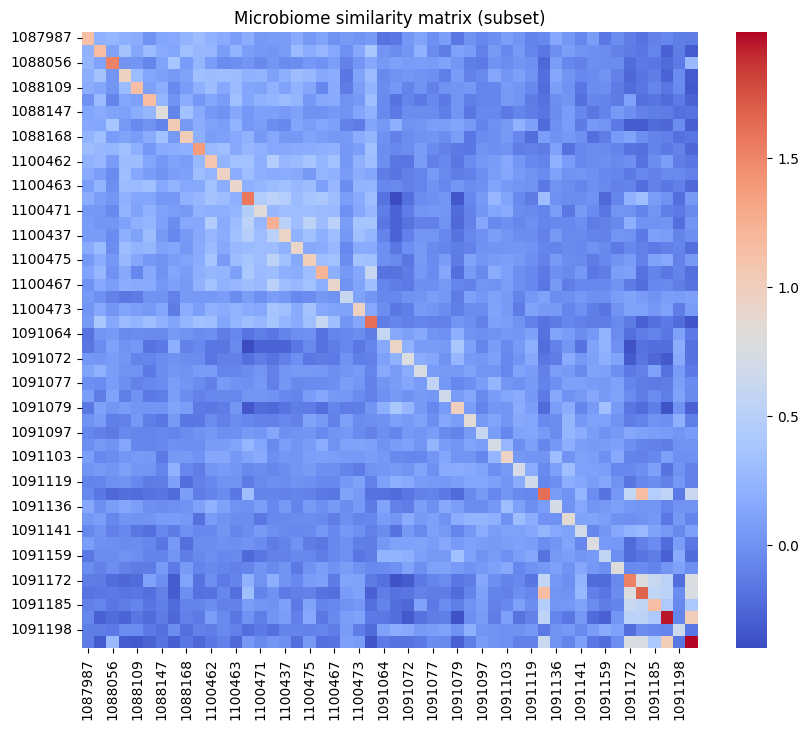

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(K_df.iloc[:50, :50], cmap="coolwarm", square=True)
plt.title("Microbiome similarity matrix (subset)")
plt.show()


In [16]:
# Also save abund_log as will be useful for matrix for LMM

output_path = "/home/dermot.kelly/Dermot_analysis/Phd/Paper_2/microbiome_ml/data/MRM_matrix.csv"

# Save without the index column
K_df.to_csv(output_path, index=True)

print(f"Saved to: {output_path}")

Saved to: /home/dermot.kelly/Dermot_analysis/Phd/Paper_2/microbiome_ml/data/MRM_matrix.csv
